In [1]:
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('chesterish')


In [2]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
from PIL import Image
import os
%matplotlib inline

In [3]:
face_cascade = cv2.CascadeClassifier('C:/Users/farha/Downloads/opencv/sources/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier("C:/Users/farha/Downloads/opencv/sources/data/haarcascades/haarcascade_eye.xml")



In [4]:
def cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img is None:
        return None
    if gray is None:
        return None
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

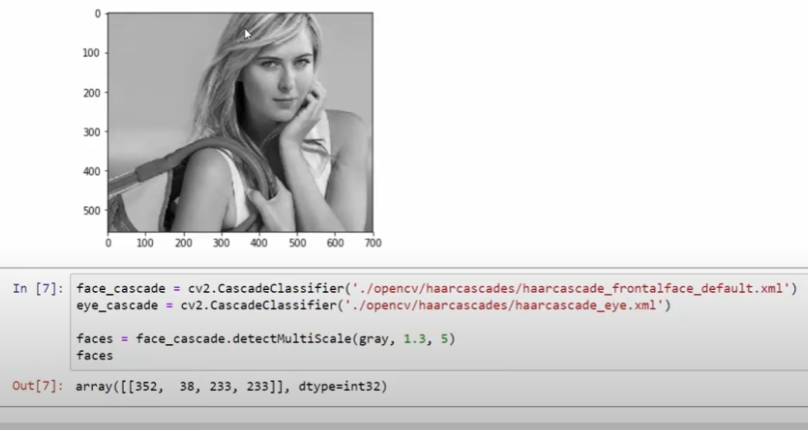

In [5]:
def moustache(image_path):
    img = cv2.imread(image_path)
    if img is None:
            return None
    else:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            y1 = int(y + (0.6*h))
            h1 = int(h - 0.55*h)
            x1 = int(x + w/5)
            w1 = int(0.6*w)
            roi_gray_moustache = gray[y1:y1+h1, x1:x1+w1].copy()
            roi_color_moustache = img[y1:y1+h1, x1:x1+w1].copy()
        return roi_color_moustache
        

In [6]:
facials = ['chevron moustache', 'toothbrush moustache', 'pencil moustache', 'handlebar moustache', 'horseshoe moustache']  

In [7]:
for folder in facials:
    dir_path = f"C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/{folder}"
    dir_path_cropped = dir_path + '_cropped5'
    
    files_in_folder = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
    
    print(f"This {folder} is Done!")
    if not os.path.exists(dir_path+'_cropped5'):
        os.makedirs(dir_path_cropped)
    os.chdir(dir_path_cropped)
    for i in range(files_in_folder):
        path = os.path.join(dir_path,str(f"train({i+1})")+'.jpg')
        
                    
        roi_color = cropped_image_if_2_eyes(path)
        if roi_color is not None:
            
            img = moustache(path)
            if img is None:
                continue
            scaled_img = cv2.resize(img, (200,200))
            filename = str(f"train({i+1})"+'.jpg')
            cv2.imwrite(filename, scaled_img)
        

This chevron moustache is Done!
This toothbrush moustache is Done!
This pencil moustache is Done!
This handlebar moustache is Done!
This horseshoe moustache is Done!


In [ ]:
Iconic Shades Classifier

In [6]:
hulk = cv2.imread(r"C:\Users\farha\KAGGLE_DS_PROJECTS\Iconic Shades Classifier\train_data\horseshoe moustache_cropped\x.jpg")

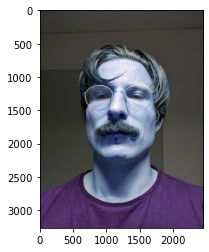

In [10]:
img =  cv2.imread("C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/chevron moustache/train(10).jpg")
plt.imshow(img)

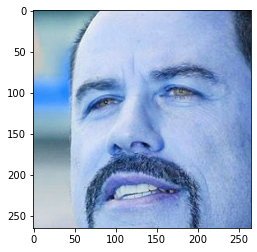

In [7]:
face = cropped_image_if_2_eyes("C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/horseshoe moustache/train(8).jpg")
plt.imshow(face)

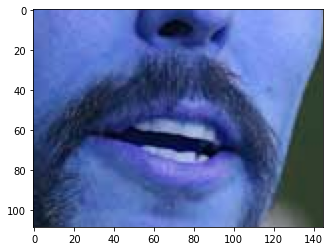

In [28]:
crop = moustache("C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/horseshoe moustache/train(24).jpg")

plt.imshow(crop)